In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree


from data_cleaning_functions import read_data, encode_label, standardize, remove_outliers
from decision_forest_algorithms import forest_predict

# Scratch
from KNN import KNN as KNN_Scratch

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

In [2]:
from Logistic_Regression import Logistic_Regression

In [3]:
data = read_data()

# Preprocessing

In [4]:
# Transformation of revenue that was a boolean into a value. It has transformed true revenue into ones.
encode_label(data)


In [5]:
data = standardize(data)
remove_outliers(data)

In [6]:
X = data.copy()
X = X.drop(['Revenue'], axis=1); #Axis = 0 drops row and Axis=1 drops column
y = data['Revenue'].copy()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 211)

# Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [9]:
model = RandomForestClassifier(max_depth = 3)
model.fit(X_train, y_train);

In [10]:
print("Test set accuracy random forest: {:.2f}".format(model.score(X_test, y_test)))

Test set accuracy random forest: 0.86


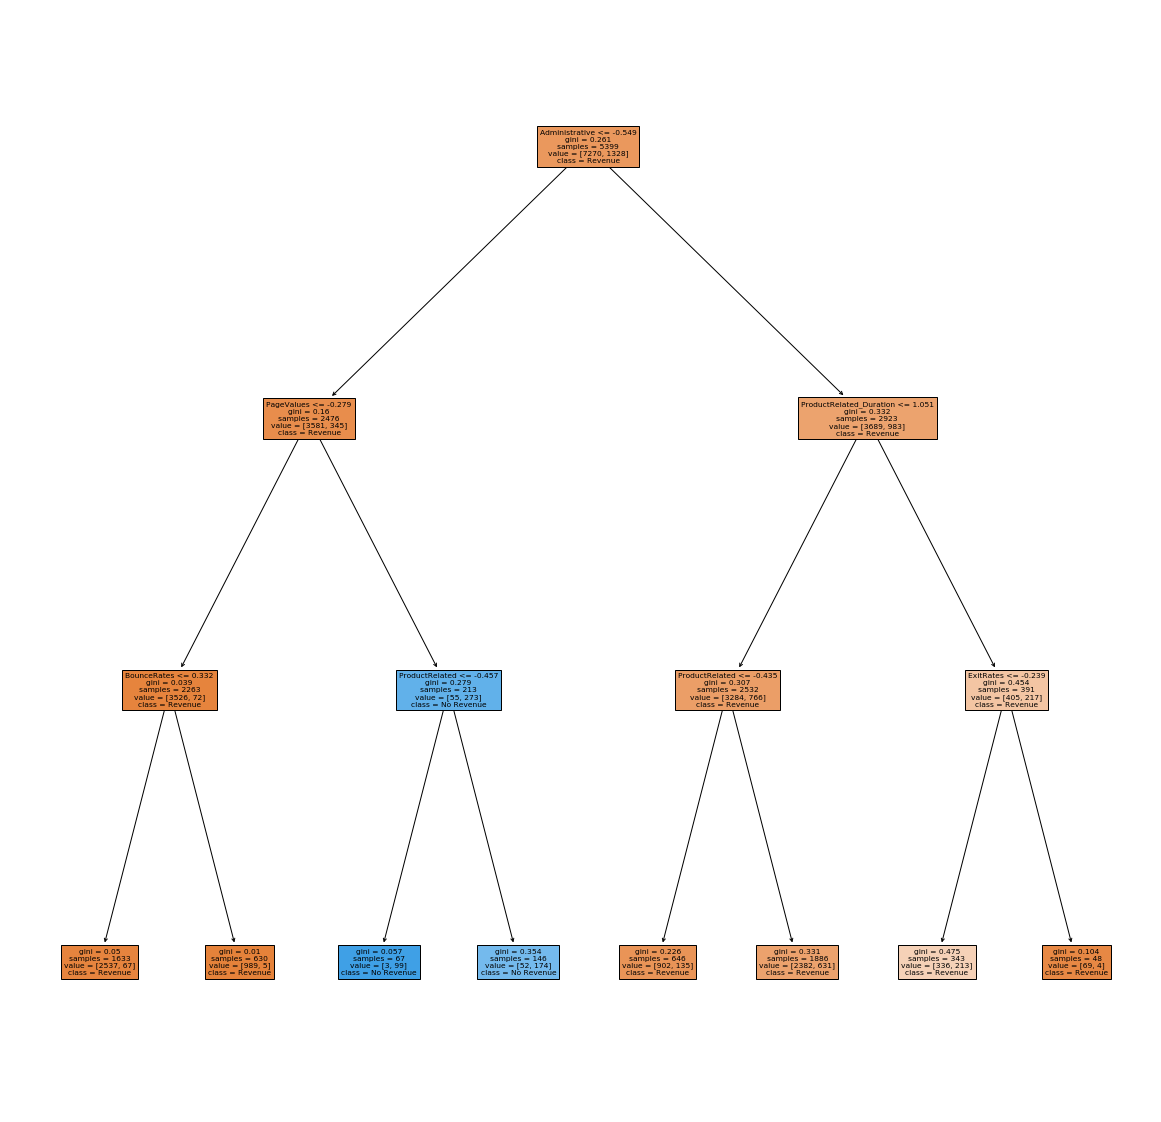

In [11]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(model.estimators_[0], feature_names=X.columns, class_names = ["Revenue", "No Revenue"], filled=True)

from sklearn.model_selection import GridSearchCV
'''
param_grid = {
    'n_estimators' : [60,75,90,115,130],
    'max_depth' : [7,14,21,28],
    'min_samples_leaf' : [1,2,3,4],
    'min_samples_split': [2,4,6,8]
}
gridsearch = GridSearchCV(estimator=rfclf,param_grid=param_grid,verbose = 1)
gridsearch.fit(x,y)
''';

# Random Forest Scratch

Accuracy Random Forest = 0.8681211331813742


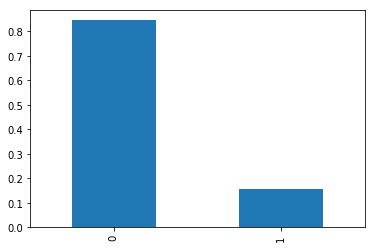

In [12]:
#We predict Revenue
data_frame_scaled = data.copy() # make a copy because data_frame_scaled gets modified by the forest algorithms
forest_predict(data_frame_scaled)

# K-Nearest Neighbors

In [13]:
from sklearn.neighbors import KNeighborsClassifier

num_neighbors = []
accuracy = []

for i in range(1,12):
    
    
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print("Neighbors: {}, test set accuracy: {}".format(i, acc))
    
    num_neighbors.append(i)
    accuracy.append(acc)
    

Neighbors: 1, test set accuracy: 0.8385345997286295
Neighbors: 2, test set accuracy: 0.8637720488466757
Neighbors: 3, test set accuracy: 0.8659430122116689
Neighbors: 4, test set accuracy: 0.8694708276797829
Neighbors: 5, test set accuracy: 0.8667571234735414
Neighbors: 6, test set accuracy: 0.8713704206241519
Neighbors: 7, test set accuracy: 0.8708276797829037
Neighbors: 8, test set accuracy: 0.8705563093622795
Neighbors: 9, test set accuracy: 0.8719131614654003
Neighbors: 10, test set accuracy: 0.8740841248303934
Neighbors: 11, test set accuracy: 0.8740841248303934


10 Neighbors optimal


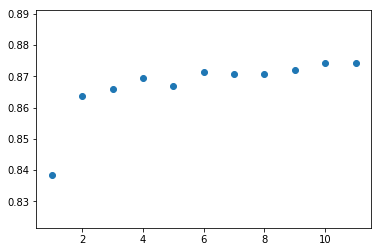

In [14]:
plt.scatter(num_neighbors, accuracy)
print("10 Neighbors optimal")

# KNN Scratch

In [17]:
model = KNN_Scratch(k=3)
model.fit(X_train.values, y_train.values)
predictions = model.predict(X_test.values)

run_time = model.end_time - model.start_time


In [18]:
acc = sum(predictions==y_test)/len(predictions)
print('Accuracy from KNN Scratch: ' + str(acc))

Accuracy from KNN Scratch: 0.8659430122116689


In [19]:
print("Run time for knn from scratch: ", run_time, "s")

Run time for knn from scratch:  230.3298614025116 s


# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
acc = model.score(X_test, y_test)
acc

0.8770691994572591

# Logistic Regression Scratch

In [22]:
model = Logistic_Regression(lr=0.001, n_iterations=1000)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [23]:
acc = sum(predictions == y_test)/len(y_test)

In [24]:
acc

0.841248303934871

# Support Vector Machine SVM

In [25]:
from sklearn.svm import SVC
param_grid = {'C':[0.1,0.5,1,50,150],
              'gamma' : [0.1,1,10,100,1000]}

In [26]:
model = SVC()
model.fit(X_train,y_train)
acc = model.score(X_test, y_test)

In [27]:
acc

0.8849389416553596

#### Finding optimal parameters

In [28]:
#param_grid = {'C':[0.1,1,10,100,1000],
#              'kernel':['rbf'],
#              'gamma' : [0.1,1,10,100,1000]}
#gridsearch = GridSearchCV(SVC(),param_grid = param_grid,verbose = 1)
#gridsearch.fit(X_train,y_train)

# Bayesian Classifier

In [29]:
from sklearn.naive_bayes import GaussianNB

In [30]:
model = GaussianNB()
model.fit(X_train, y_train)
acc = model.score(X_test, y_test)

In [31]:
acc

0.8048846675712348